In [8]:
#import dependencies 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = [10, 6]

In [9]:
import numpy as np
import pandas as pd
from datetime import timedelta, datetime
import datetime as dt

In [10]:
#Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
#create sqlite database connection
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
#reflect the data into clases 
#assign base 
Base = automap_base()

#Reflect the classes into tables 
Base.prepare(engine, reflect=True)

Table1 = Base.classes.measurement
Table2 = Base.classes.station


In [13]:
# Create a session
session = Session(engine)

# Perform operations using the session
results1 = session.query(Table1).all()
results2 = session.query(Table2).all()


In [14]:
#Precipitation analyais 

In [15]:
most_recent_entry = session.query(Table1).order_by(Table1.date.desc()).first()

if most_recent_entry:
    most_recent_date = most_recent_entry.date
    print("Most recent entry date in measurment class:", most_recent_date)
else:
    print("No data found in the class.")

Most recent entry date in measurment class: 2017-08-23


In [16]:
most_recent_entry = session.query(Table2).first()
most_recent_entry.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fe267799cc0>,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

In [104]:
most_recent_entry = session.query(Table1).first()
most_recent_entry.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb17660a770>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08}

In [105]:
#Calculate the date twelve months ago
twelve_months_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Query the data for the last twelve months
results = session.query(Table1).filter(Table1.date >= twelve_months_ago).all()


In [106]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Table1.date, Table1.prcp).filter(Table1.date >= twelve_months_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_precip_df = pd.DataFrame(results, columns=['date', 'precipitation'])

In [107]:
#Take a quick look
date_precip_df.head(10)

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [108]:
#sort the date values in a new df.
sorted_date = date_precip_df.sort_values('date')

In [109]:
sorted_date['date'].min()

'2016-08-23'

Text(0.5, 1.0, 'Date by Precipitation')

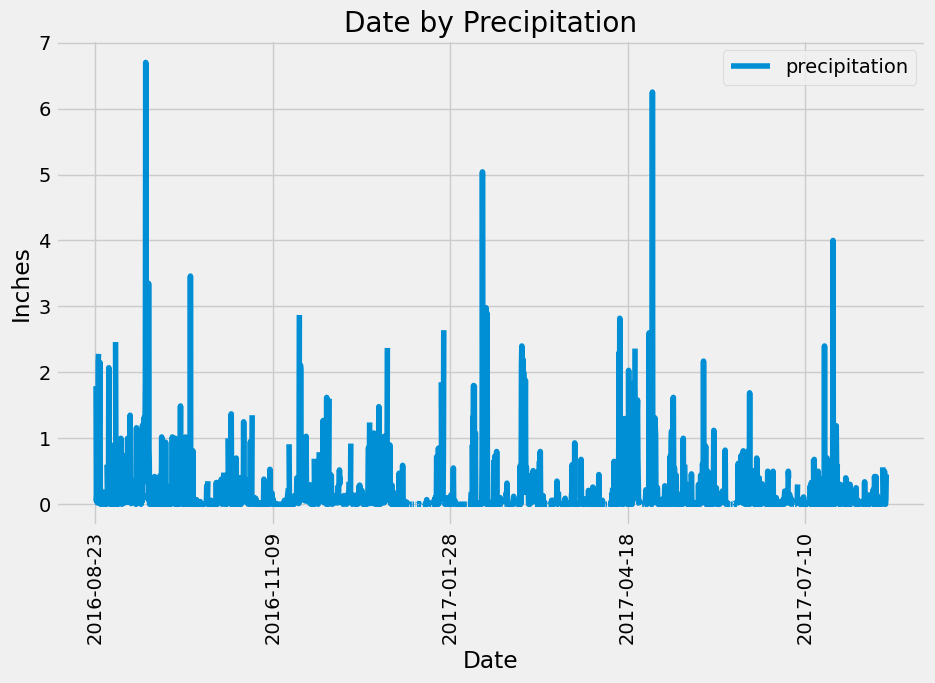

In [110]:
#Create a graph representing Rainfall distribution throughout the years
sorted_date.plot(x='date', y='precipitation', rot = 90)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.title('Date by Precipitation')


In [111]:
#Summary Statistics on precip_sorted_date
precip_data_sumary = sorted_date.describe()
precip_data_sumary

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [112]:
#Stations Analysis 
#Get number of stations in the data set
station_num = session.query(func.count(Table2.station)).all()
station_num

[(9,)]

## There are nine stations.

In [113]:
#most activate stations 
active_stations = session.query(Table1.station,func.count(Table1.station)).group_by(Table1.station).order_by(func.count(Table1.station).desc()).all()
#select ststions from table 2
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

### It seems that station 'USC00519281' had the most traffic. 

In [114]:
most_active_station = active_stations[0][0]
# Obtain the station name from station id
most_active_location = session.query(Table2.name).\
    filter(Table2.station == most_active_station).first()

#print station id and the associated name
print(f'The most active station is {most_active_station} located in {most_active_location}!')

# Obtain lowest temp for the desired station
lowest_temp = session.query(func.min(Table1.tobs)).\
    filter(Table1.station == most_active_station).first()

# Obtain highest temp for the desired station
highest_temp = session.query(func.max(Table1.tobs)).\
    filter(Table1.station == most_active_station).first()

# Obtain the average temp for the desired station
avg_temp = session.query(func.avg(Table1.tobs)).\
    filter(Table1.station == most_active_station).first()

print(f'The lowest temp at {most_active_station} in {most_active_location} from the data was {lowest_temp} degrees Fahrenheit!')
print(f'The highest temp at {most_active_station} in {most_active_location} from the data was {highest_temp} degrees Fahrenheit!')
print(f'The average temp at {most_active_station} in {most_active_location} from the data was {avg_temp} degrees Fahrenheit!')


The most active station is USC00519281 located in ('WAIHEE 837.5, HI US',)!
The lowest temp at USC00519281 in ('WAIHEE 837.5, HI US',) from the data was (54.0,) degrees Fahrenheit!
The highest temp at USC00519281 in ('WAIHEE 837.5, HI US',) from the data was (85.0,) degrees Fahrenheit!
The average temp at USC00519281 in ('WAIHEE 837.5, HI US',) from the data was (71.66378066378067,) degrees Fahrenheit!


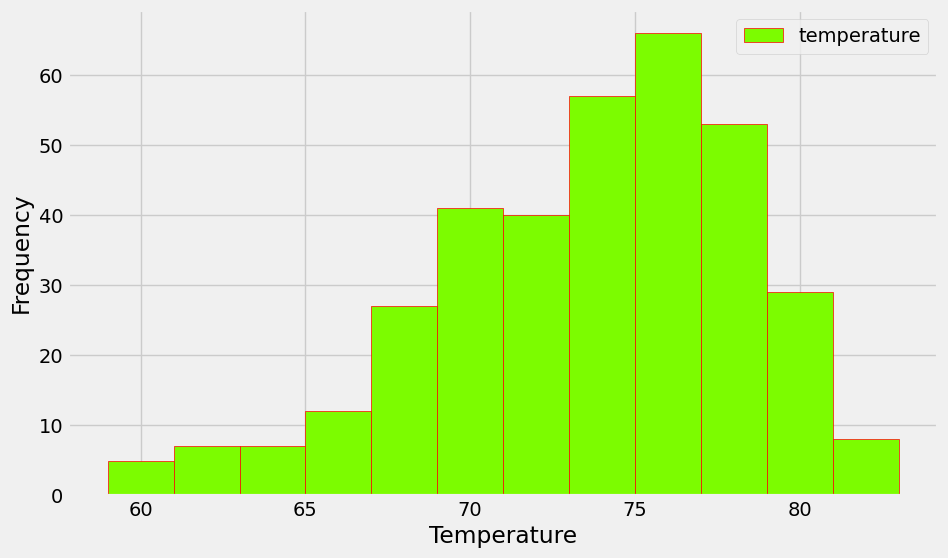

In [122]:
# Using the most active station id, query the last 12 months of temperature observation data for this station and plot the results as a histogram

pastyrtemp = session.query(Table1.date,Table1.tobs).filter(
    Table1.date <= most_recent_date,
    Table1.date >= twelve_months_ago.strftime('%Y-%m-%d'),
    Table1.station==most_active_station).all()
#convert the query into a dataframe
best_temp_df=pd.DataFrame([(item.date, item.tobs) for item in pastyrtemp],
                  columns=['date', 'temperature'])
#plot df as histogram
best_temp_df.plot.hist(x='date',y='temperature',bins=12,color='lawngreen', edgecolor='red')
plt.xlabel('Temperature')
plt.show()

## Session Close

In [ ]:
# Close Session
session.close()